## 100 Prisoner problem 

right click and open in new window


<a href="https://en.wikipedia.org/wiki/100_prisoners_problem" target="_blank">100 Prisoner problem in Wikipedia</a>


<a href="https://youtu.be/iSNsgj1OCLA?si=xufFKI5afCcTzbtU" target="_blank">100 Prisoner problem video by Veratasium</a>


#### see notes in spreadsheet file

In [37]:

import numpy as np


def simulate_prisoners_problem(num_prisoners=100, num_attempts=50,num_trials=1000):
    """
    Simulates the 100 prisoners problem and calculates success probability.
    
    Parameters:
        num_prisoners (int): Number of prisoners (and boxes).
        num_attempts (int): Number of attempts each prisoner gets to open boxes.
        num_trials (int): Number of trials to simulate.
        
    Returns:
        success_rate (float): Probability of all prisoners finding their number.
    """
    successes = 0

    for t in range(num_trials):
        # Step 1: Shuffle numbers into boxes
        boxes = np.random.permutation(num_prisoners)

        # Step 2: Simulate the strategy for all prisoners
        all_success = True
        for prisoner in range(num_prisoners):
            found = False
            box_to_open = prisoner
            for a in range(num_attempts):  # Up to num_attempts attempts
                if boxes[box_to_open] == prisoner:
                    found = True
                    break
                box_to_open = boxes[box_to_open]  # Follow the cycle
            
            if not found:
                all_success = False
                break

        # Step 3: Record the trial outcome
        if all_success:
            successes += 1

    # Step 4: Calculate success probability
    success_rate = successes / num_trials
    return success_rate

# Run the simulation
num_trials = 100000
num_prisoners=100
num_attempts=50
success_rate = simulate_prisoners_problem(100, 50, num_trials)
print(f"Prisoners: {num_prisoners}, Attempts: {num_attempts}, Success Rate: {success_rate:.4%}")

Prisoners: 100, Attempts: 50, Success Rate: 31.0320%


c:\Users\gwied\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


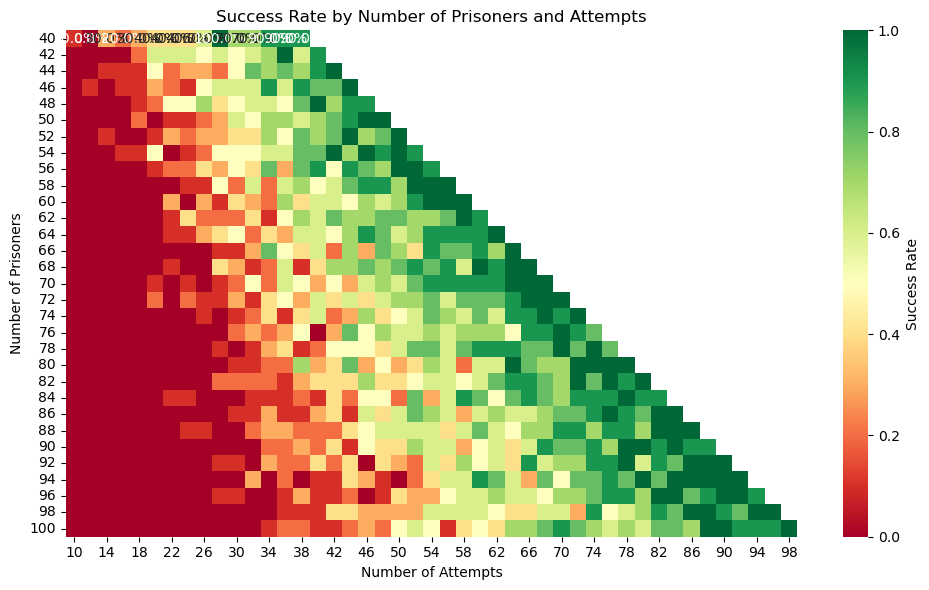

In [38]:

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#Let's vary the number of prisoners and attempts and see how the success rate changes

chunks = 30

min_prisoners = 40
max_prisoners = 100
min_attempts = 10
step_size_prisoners = (max_prisoners-min_prisoners)//(chunks-1)

prisonersRange=range(min_prisoners, max_prisoners+step_size_prisoners,step_size_prisoners)

num_trials = 10
results = []

for num_prisoners in prisonersRange:

    attemptsRange=range(min_attempts,num_prisoners,2)
    for num_attempts in attemptsRange:

        success_rate = simulate_prisoners_problem(num_prisoners, num_attempts,num_trials)
        results.append((num_prisoners, num_attempts, success_rate))


df=pd.DataFrame(results,columns=['Prisoners','Attempts','SucessRate'],index=None)        


# Create a pivot table for the heatmap
pivot_table = df.pivot(index='Prisoners', columns='Attempts', values='SucessRate')

# Create the heatmap with enhanced styling
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, 
            annot=True,               # Show numbers in cells
            fmt='.1%',                # Format as percentages
            cmap='RdYlGn',           # Red-Yellow-Green colormap
            vmin=0, vmax=1,          # Fix scale from 0 to 1
            center=0.5,              # Center the colormap at 0.5
            cbar_kws={'label': 'Success Rate'})

plt.title('Success Rate by Number of Prisoners and Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Prisoners')
plt.tight_layout()
plt.show()
